## Решение домашнего задания к уроку 3. TensorFlow

### Задание:
#### Используя файл Web3.ipynb (он в полезных ссылках):

Постройте нейронную сеть (берем несложную полносвязную сеть, меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасете from sklearn.datasets import load_boston.

Постройте 10-15 вариантов разных нейронных сетей и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [4]:
pip install scikit-learn==1.1.3

In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential, Model

%matplotlib inline

In [6]:
tf.random.set_seed(1)

In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [9]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['target'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
X = boston.drop(['target'], axis=1)
y = boston['target']

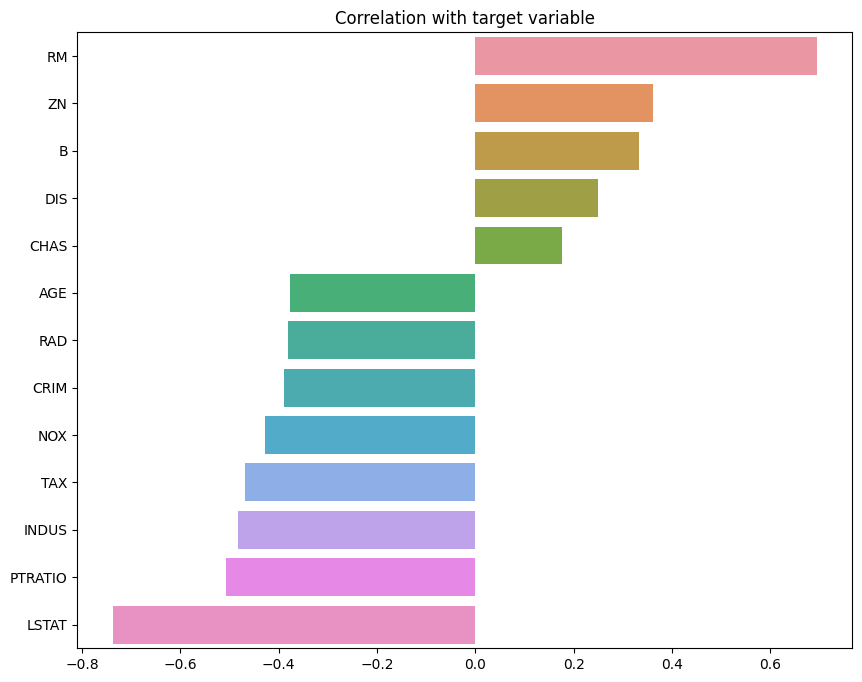

In [13]:
corr_with_target = boston.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [14]:
# Масштабирование
X_sc = StandardScaler().fit(X).transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [16]:
results = pd.DataFrame() # сводная таблица результатов
n_layers = [] # число слоев
n_nums = [] # число нейронов
act_func = [] # функция активации
opt = [] # оптимизатор
train_mse = [] # ошибка на тренировочной выборке
test_mse = [] # ошибка на тестовой выборке

Будем проверять следующие значения:<br>
n_layers: 3, 5 и 10 <br>
n_nums: 8, 32 и 128 <br>
act_func: ReLU, sigmoid и tanh <br>
opt: RMSProp и Adam<br>



Параметры текущей нейронной сети: 3 слоя, 8 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 333.8351 - mse: 333.8351 - 68ms/epoch - 6ms/step
5/5 - 0s - loss: 320.7763 - mse: 320.7763 - 46ms/epoch - 9ms/step

Параметры текущей нейронной сети: 3 слоя, 8 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 286.9367 - mse: 286.9367 - 88ms/epoch - 7ms/step
5/5 - 0s - loss: 272.4355 - mse: 272.4355 - 41ms/epoch - 8ms/step

Параметры текущей нейронной сети: 3 слоя, 8 нейронов, функция активации sigmoid, оптимизатор RMSprop...
12/12 - 0s - loss: 387.1880 - mse: 387.1880 - 37ms/epoch - 3ms/step
5/5 - 0s - loss: 368.2928 - mse: 368.2928 - 25ms/epoch - 5ms/step

Параметры текущей нейронной сети: 3 слоя, 8 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 452.3080 - mse: 452.3080 - 43ms/epoch - 4ms/step
5/5 - 0s - loss: 427.8306 - mse: 427.8306 - 28ms/epoch - 6ms/step

Параметры текущей нейронной сети: 3 слоя, 8 нейронов, ф

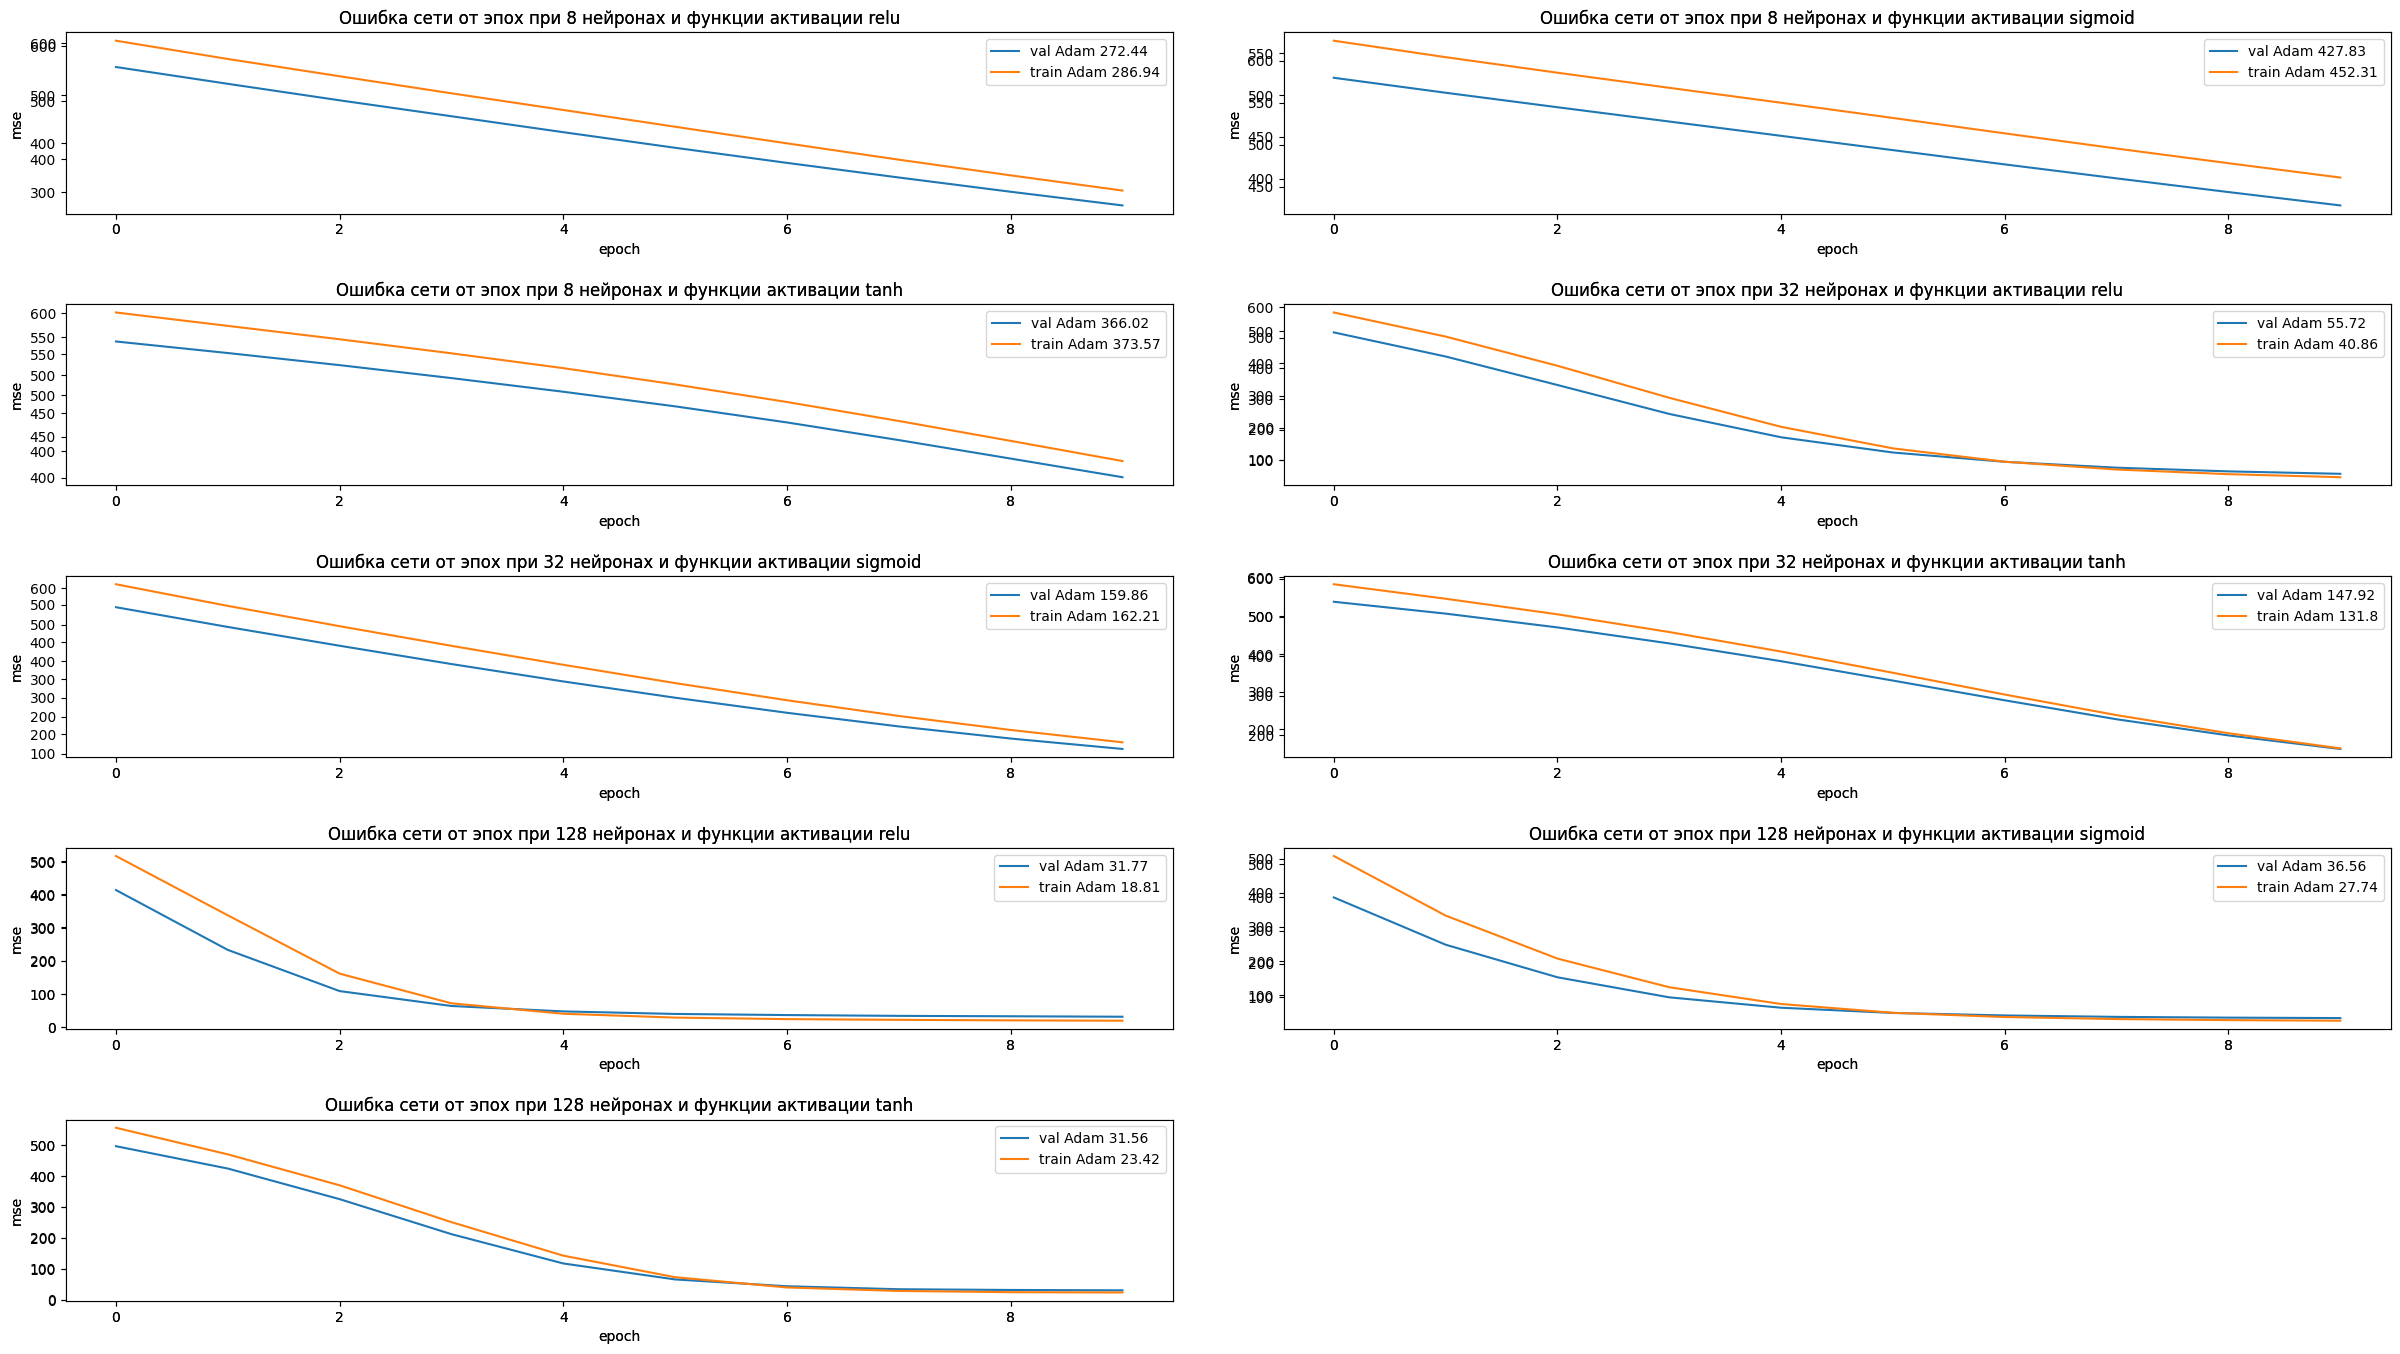

In [17]:
# Рассмотрим 3-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [8, 32, 128]:
  for f in ['relu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(3)
      n_nums.append(n)
      act_func.append(f)
      opt.append(o)

      print(f'\nПараметры текущей нейронной сети: 3 слоя, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      outputs = Dense(1)(x_2)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mse'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test),
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mse.append(train_m)
      test_mse.append(test_m)

      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
      ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mse')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 5 слоёв, 8 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 81.2280 - mse: 81.2280 - 57ms/epoch - 5ms/step
5/5 - 0s - loss: 94.9441 - mse: 94.9441 - 45ms/epoch - 9ms/step

Параметры текущей нейронной сети: 5 слоёв, 8 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 31.0144 - mse: 31.0144 - 187ms/epoch - 16ms/step
5/5 - 0s - loss: 44.8611 - mse: 44.8611 - 170ms/epoch - 34ms/step

Параметры текущей нейронной сети: 5 слоёв, 8 нейронов, функция активации sigmoid, оптимизатор RMSprop...
12/12 - 0s - loss: 285.7048 - mse: 285.7048 - 38ms/epoch - 3ms/step
5/5 - 0s - loss: 264.6739 - mse: 264.6739 - 27ms/epoch - 5ms/step

Параметры текущей нейронной сети: 5 слоёв, 8 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 367.0804 - mse: 367.0804 - 65ms/epoch - 5ms/step
5/5 - 0s - loss: 342.3705 - mse: 342.3705 - 49ms/epoch - 10ms/step

Параметры текущей нейронной сети: 5 слоёв, 8 нейронов,

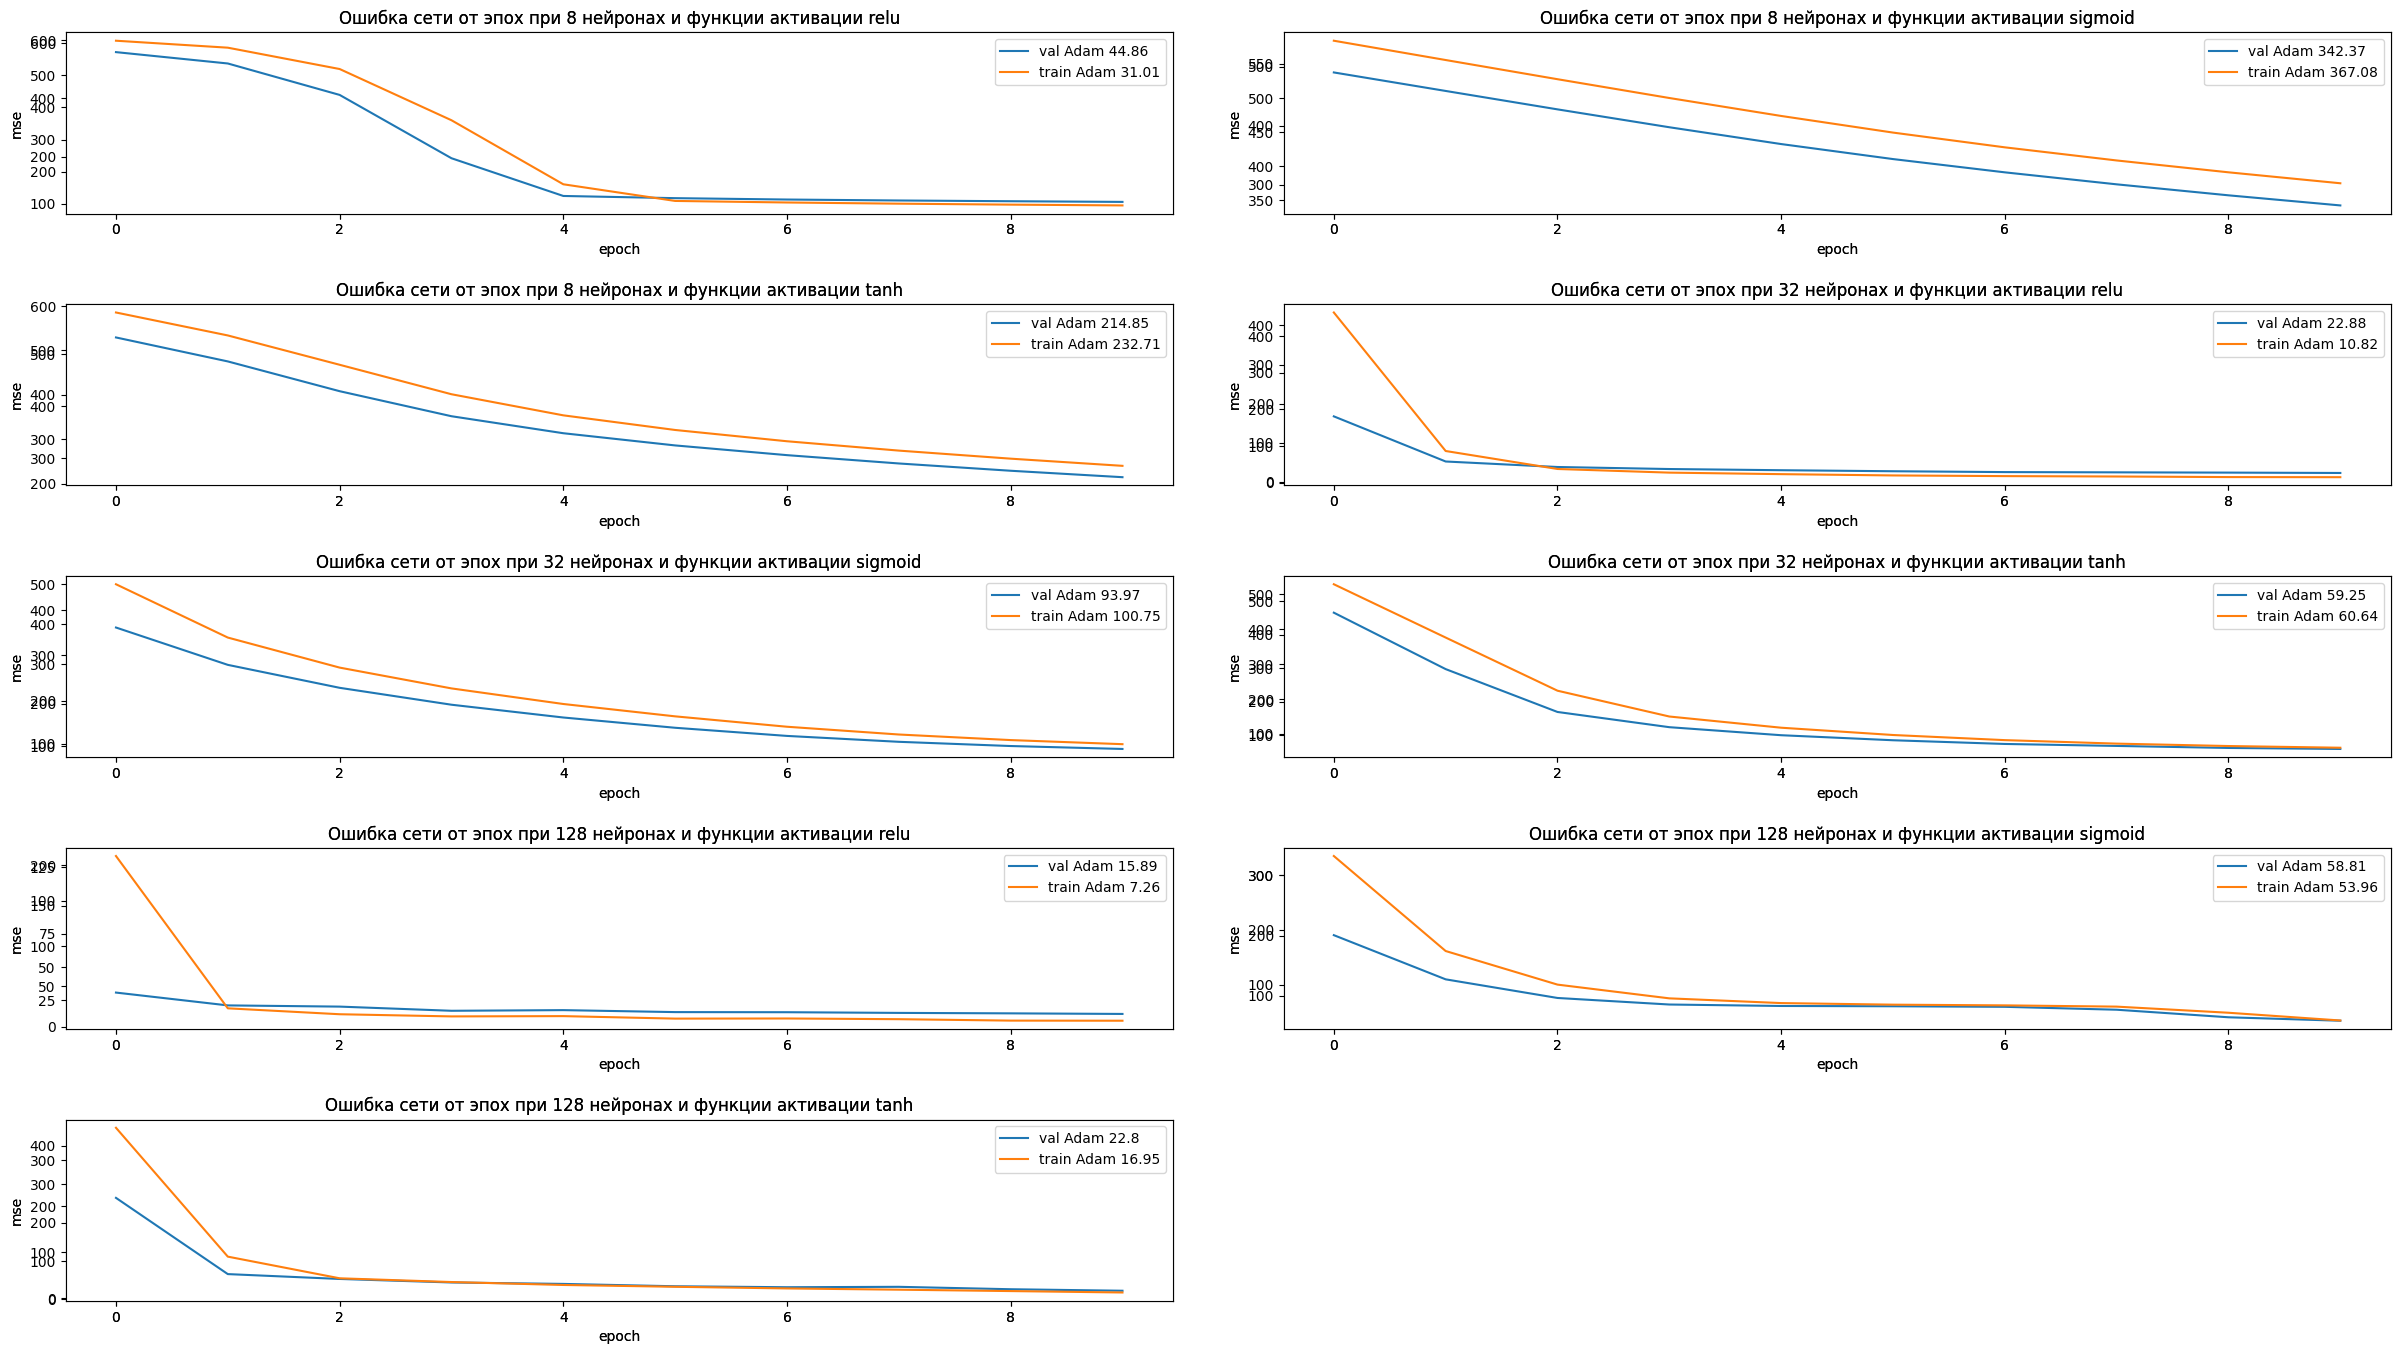

In [18]:
# Рассмотрим 5-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [8, 32, 128]:
  for f in ['relu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(5)
      n_nums.append(n)
      act_func.append(f)
      opt.append(o)

      print(f'\nПараметры текущей нейронной сети: 5 слоёв, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      x_3 = Dense(n, activation=f)(x_2)
      x_4 = Dense(n, activation=f)(x_3)
      outputs = Dense(1)(x_4)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mse'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test),
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mse.append(train_m)
      test_mse.append(test_m)

      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
      ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mse')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 10 слоёв, 8 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 21.8482 - mse: 21.8482 - 45ms/epoch - 4ms/step
5/5 - 0s - loss: 34.3405 - mse: 34.3405 - 32ms/epoch - 6ms/step

Параметры текущей нейронной сети: 10 слоёв, 8 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 16.8670 - mse: 16.8670 - 40ms/epoch - 3ms/step
5/5 - 0s - loss: 30.3118 - mse: 30.3118 - 35ms/epoch - 7ms/step

Параметры текущей нейронной сети: 10 слоёв, 8 нейронов, функция активации sigmoid, оптимизатор RMSprop...
12/12 - 0s - loss: 366.2762 - mse: 366.2762 - 48ms/epoch - 4ms/step
5/5 - 0s - loss: 341.5209 - mse: 341.5209 - 30ms/epoch - 6ms/step

Параметры текущей нейронной сети: 10 слоёв, 8 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 371.3660 - mse: 371.3660 - 66ms/epoch - 6ms/step
5/5 - 0s - loss: 346.3971 - mse: 346.3971 - 76ms/epoch - 15ms/step

Параметры текущей нейронной сети: 10 слоёв, 8 нейронов

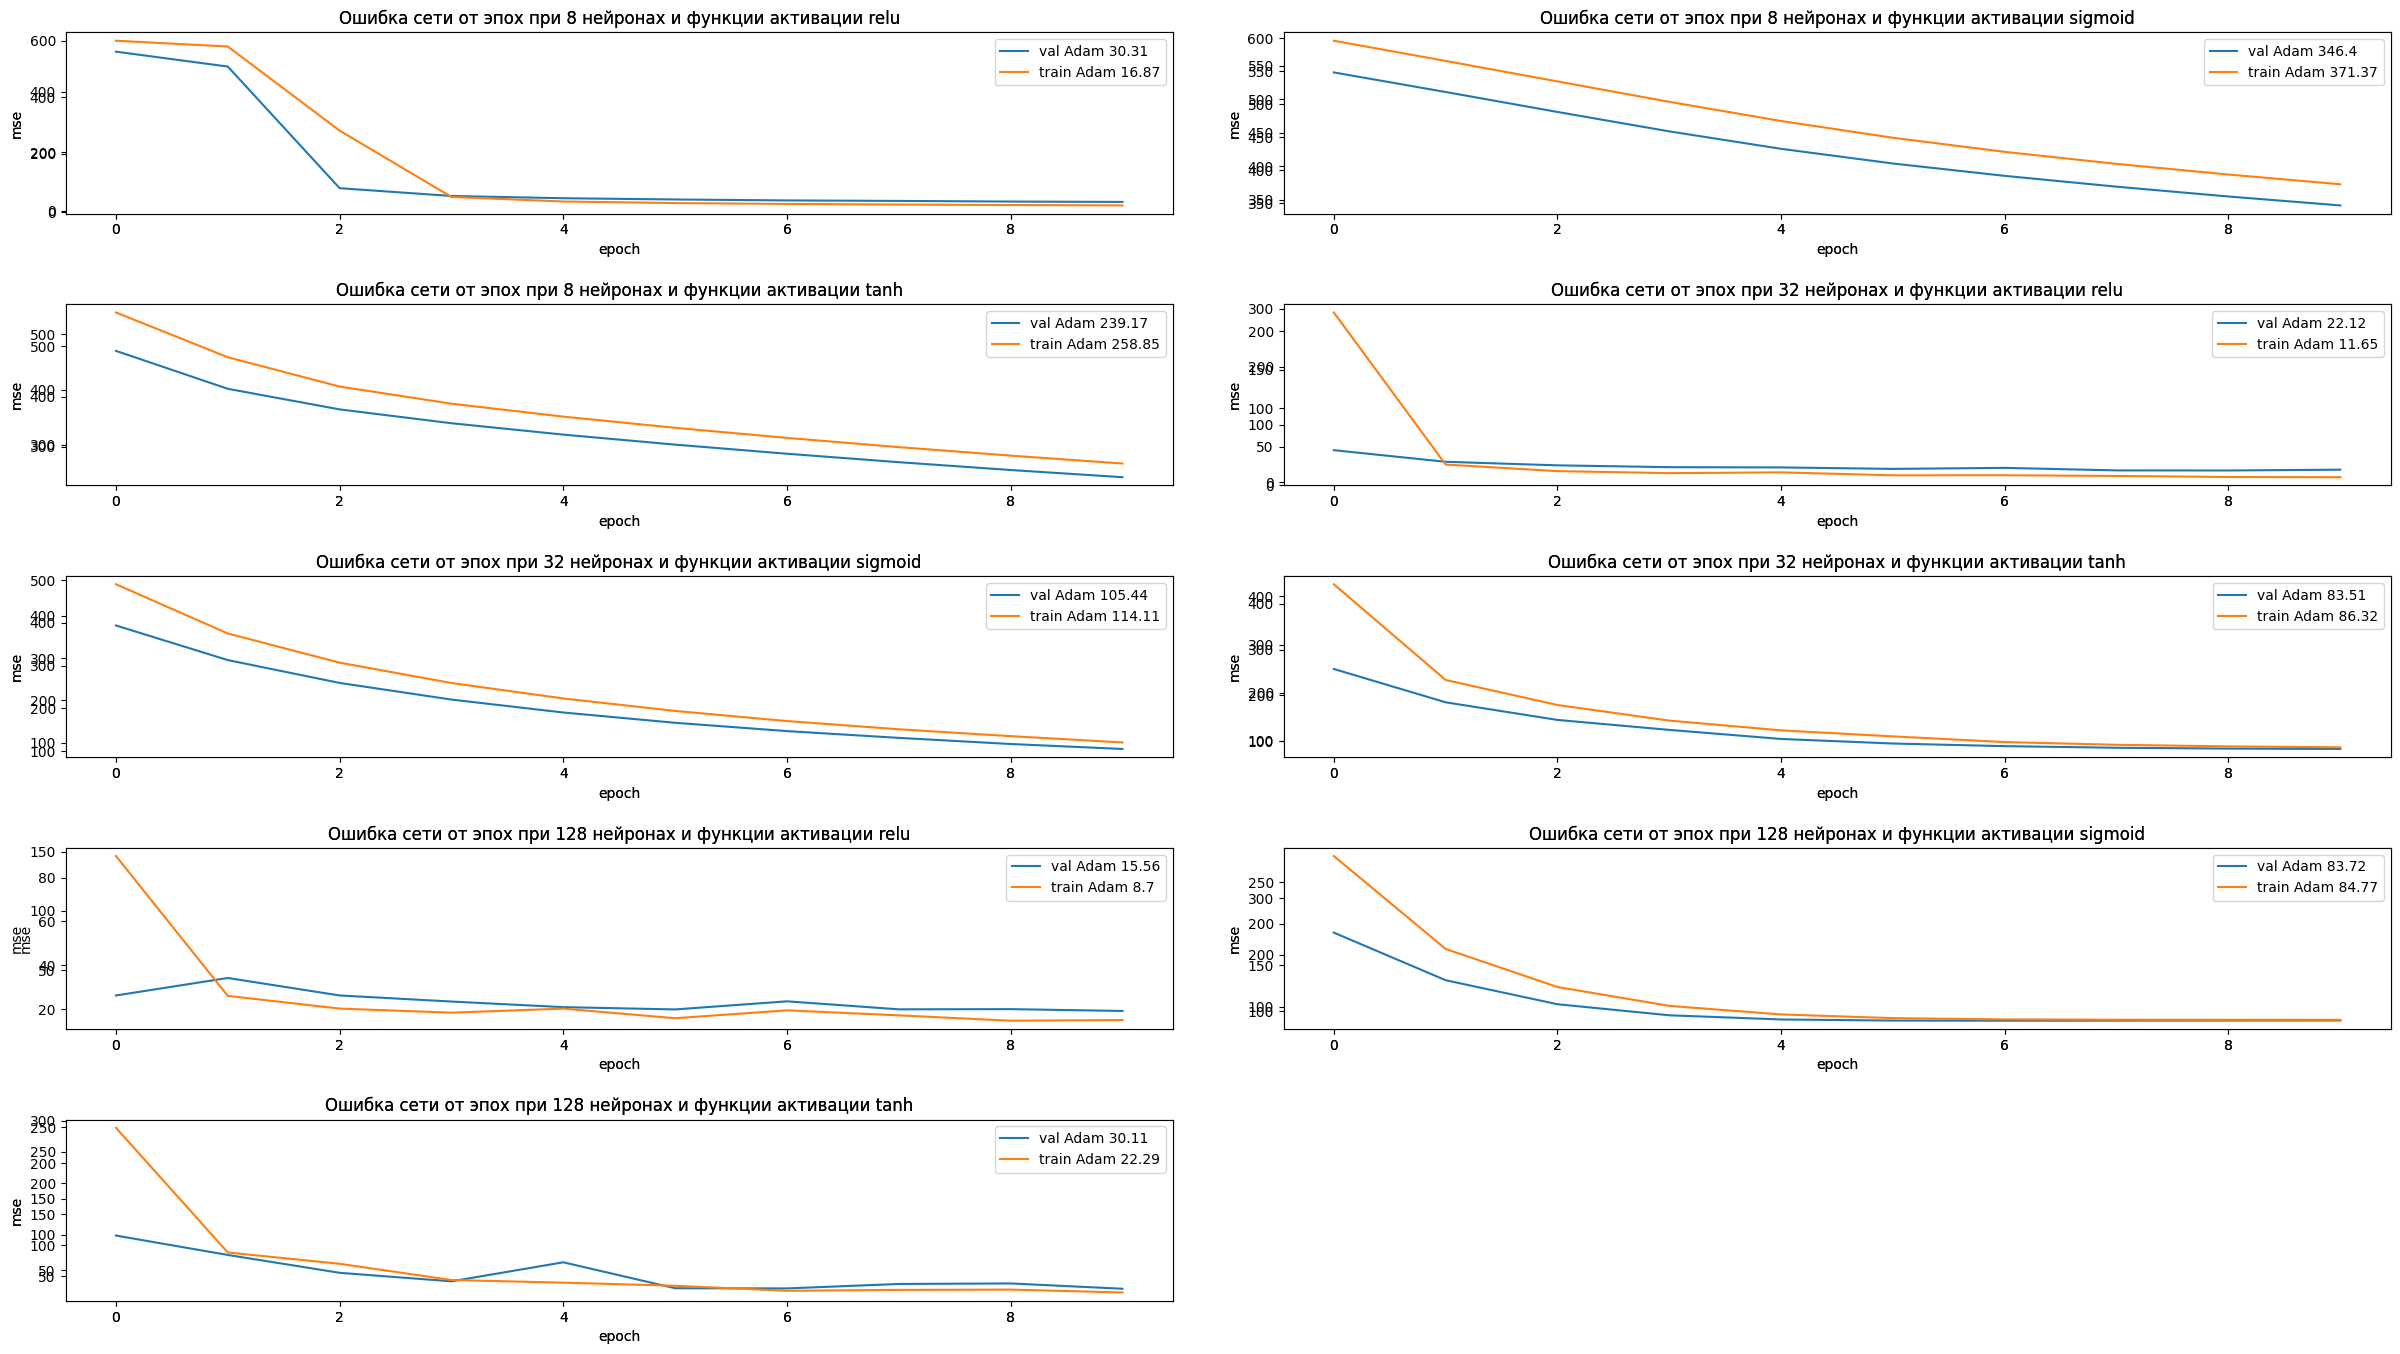

In [19]:
# Рассмотрим 10-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [8, 32, 128]:
  for f in ['relu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(10)
      n_nums.append(n)
      act_func.append(f)
      opt.append(o)

      print(f'\nПараметры текущей нейронной сети: 10 слоёв, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      x_3 = Dense(n, activation=f)(x_2)
      x_4 = Dense(n, activation=f)(x_3)
      x_5 = Dense(n, activation=f)(x_4)
      x_6 = Dense(n, activation=f)(x_5)
      x_7 = Dense(n, activation=f)(x_6)
      x_8 = Dense(n, activation=f)(x_7)
      x_9 = Dense(n, activation=f)(x_8)
      outputs = Dense(1)(x_9)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mse'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test),
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mse.append(train_m)
      test_mse.append(test_m)

      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
      ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mse')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()

In [20]:
results['n_layers'] = n_layers
results['n_nums'] = n_nums
results['act_func'] = act_func
results['opt'] = opt
results['train_mse'] = train_mse
results['test_mse'] = test_mse
results['overtr_diff'] = results['test_mse'] - results['train_mse']

In [21]:
results.sort_values(by=['test_mse','overtr_diff'], ascending=[True, True])

,n_layers,n_nums,act_func,opt,train_mse,test_mse,overtr_diff
49,10,128,relu,Adam,8.696736,15.559227,6.862491
31,5,128,relu,Adam,7.257773,15.886468,8.628695
34,5,128,tanh,RMSprop,11.048840,17.871668,6.822828
30,5,128,relu,RMSprop,12.356371,18.537237,6.180866
43,10,32,relu,Adam,11.647963,22.122866,10.474903
35,5,128,tanh,Adam,16.951048,22.796032,5.844984
25,5,32,relu,Adam,10.818292,22.877029,12.058738
24,5,32,relu,RMSprop,14.249891,23.726019,9.476128
42,10,32,relu,RMSprop,16.740726,26.806910,10.066183
53,10,128,tanh,Adam,22.292044,30.113773,7.821730


### Выводы
1. Лучшее качество получилось на максимальном количестве слоев (10) и максимальном количестве нейронов (128). Обратное также прослеживается на графиках: чем меньше слоев и нейронов - тем больше ошибка.
2. Наименьшая ошибка получилась с оптимизатором Adam. Но в целом, RMSprop не сильно ему уступает.

Лушее качество получилось при [10,	128, relu,	Adam]: <br>
То есть получили сравнительно небольшую ошибку, но довольно большое переобучение.<br>
Получим предсказания модели для обех выборок:

In [22]:
inputs = Input(shape=(13,))
x_1 = Flatten()(inputs)
x_2 = Dense(128, activation='relu')(x_1)
x_3 = Dense(128, activation='relu')(x_2)
x_4 = Dense(128, activation='relu')(x_3)
x_5 = Dense(128, activation='relu')(x_4)
x_6 = Dense(128, activation='relu')(x_5)
x_7 = Dense(128, activation='relu')(x_6)
x_8 = Dense(128, activation='relu')(x_7)
x_9 = Dense(128, activation='relu')(x_8)
outputs = Dense(1)(x_9)

model = Model(inputs, outputs)

model.compile(optimizer='Adam',
                    loss='mse',
                    metrics=['mse'])

model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test),
                    verbose=1)

train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 13)]              0         
                                                                 
 flatten_54 (Flatten)        (None, 13)                0         
                                                                 
 dense_270 (Dense)           (None, 128)               1792      
                                                                 
 dense_271 (Dense)           (None, 128)               16512     
                                                                 
 dense_272 (Dense)           (None, 128)               16512     
                                                                 
 dense_273 (Dense)           (None, 128)               16512     
                                                                 
 dense_274 (Dense)           (None, 128)               165

In [23]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [24]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Коэффициент детерминации на тренировочной выборке: {round(r2_train,2)}')
print(f'Коэффициент детерминации на тестовой выборке: {round(r2_test,2)}')

Коэффициент детерминации на тренировочной выборке: 0.91
Коэффициент детерминации на тестовой выборке: 0.82


У нас получилось переобучение в 9%, что в целом, хорошо.



### Общий вывод
**Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?**<br>
В итоге добились сравнительно неплохого качества модели. <br>
Точность увеличивается с ростом числа слоев и числа нейронов. Но надо не забывать про переобучение.<br>
Оптимизаторы и функции активации надо подбирать исходя из количества слоев и нейронов, так как разные значения показывают разное качество и нет ярко-выраженной зависимости. <br>
Для задач регрессии больше подходят функции активации relu.<br>
